In [2]:
from HestonFunctions import Heston_explicit_bf, HestonCallClosedForm, PIntegrand, P 
import numpy as np

In [3]:
#print(HestonCallClosedForm(lambda_= 2, vbar= 0.2, eta=0.2, rho=-0.8, v0=0, r=0.03, tau=1, S0=200, K=100))

import matplotlib.pyplot as plt

# Define the range of S0 and v0
S0_range = np.linspace(0, 200, 201)
v0_range = np.linspace(0, 1, 101)

# Create a meshgrid of S0 and v0
S0, v0 = np.meshgrid(S0_range, v0_range)

# Initialize the HestonPrice matrix
HestonPrice = np.zeros((len(v0_range), len(S0_range)))

# Calculate the HestonPrice matrix
for i in range(len(v0_range)):
    for j in range(len(S0_range)):
        if S0_range[j] == 0:
            HestonPrice[i][j] = 0
        else:
            HestonPrice[i][j] = HestonCallClosedForm(lambda_= 2, vbar= 0.2, eta=0.3, rho=0.8, v0=v0_range[i], r=0.03, tau=1, S0=S0_range[j], K=100)




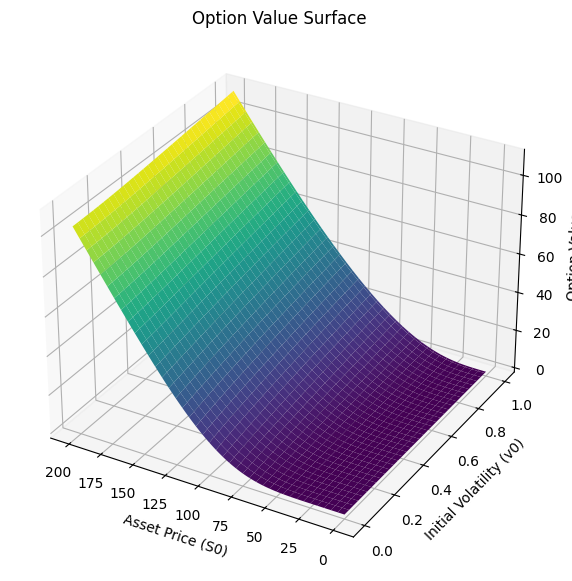

In [4]:
# Create a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(S0, v0, HestonPrice, cmap='viridis')
ax.invert_xaxis()

# Labels
ax.set_xlabel('Asset Price (S0)')
ax.set_ylabel('Initial Volatility (v0)')
ax.set_zlabel('Option Value')

# Title
ax.set_title('Option Value Surface')

# Show the plot
plt.show()

In [5]:
def calculate_greeks(lambda_, vbar, eta, rho, v0, r, tau, S0, K, h=1e-5):
    # Calculate Greeks using finite difference method
    delta = (HestonCallClosedForm(lambda_, vbar, eta, rho, v0, r, tau, S0 + h, K) - 
             HestonCallClosedForm(lambda_, vbar, eta, rho, v0, r, tau, S0 - h, K)) / (2 * h)
    
    gamma = (HestonCallClosedForm(lambda_, vbar, eta, rho, v0, r, tau, S0 + h, K) - 
             2 * HestonCallClosedForm(lambda_, vbar, eta, rho, v0, r, tau, S0, K) +
             HestonCallClosedForm(lambda_, vbar, eta, rho, v0, r, tau, S0 - h, K)) / (h**2)
    
    vega = (HestonCallClosedForm(lambda_, vbar, eta, rho, v0 + h, r, tau, S0, K) - 
            HestonCallClosedForm(lambda_, vbar, eta, rho, v0 - h, r, tau, S0, K)) / (2 * h)
    
    return delta, gamma, vega

In [6]:
# Define the range of S0 and v0
S0_range = np.linspace(0, 200, 201)
v0_range = np.linspace(0, 1, 101)

In [7]:
# Create a grid of S0 and tau values
S0_grid, v0_grid = np.meshgrid(S0_range, v0_range)

# Initialize empty arrays for Delta, Gamma, and Vega values
delta_grid = np.zeros_like(S0_grid)
gamma_grid = np.zeros_like(S0_grid)
vega_grid = np.zeros_like(S0_grid)




In [8]:
lambda_= 2
vbar= 0.2 
eta=0.3
rho=0.8
r=0.03
tau=1
K=100

# Calculate Greeks for each point in the grid
for i in range(len(S0_range)):
    for j in range(len(v0_grid)):
        delta, gamma, vega = calculate_greeks(lambda_, vbar, eta, rho, v0_grid[j, i], r, tau, S0_grid[j, i], K)
        delta_grid[j, i] = delta
        gamma_grid[j, i] = gamma
        vega_grid[j, i] = vega



c:\Users\Souvik Chakraborty\Desktop\2022 Masters\UvA\Study\2nd year Period 2\Advanced Computational Finance\Heston-FD\HestonFunctions.py:41: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  value, _ = quad(PIntegrand, 0, np.inf, args=(lambda_, vbar, eta, rho, v0, r, tau, S0, K, j))
c:\Users\Souvik Chakraborty\Desktop\2022 Masters\UvA\Study\2nd year Period 2\Advanced Computational Finance\Heston-FD\HestonFunctions.py:13: RuntimeWarning: invalid value encountered in log
  x = np.log(F / K)
c:\Users\Souvik Chakraborty\Desktop\2022 Masters\UvA\Study\2nd year Period 2\Advanced Computation

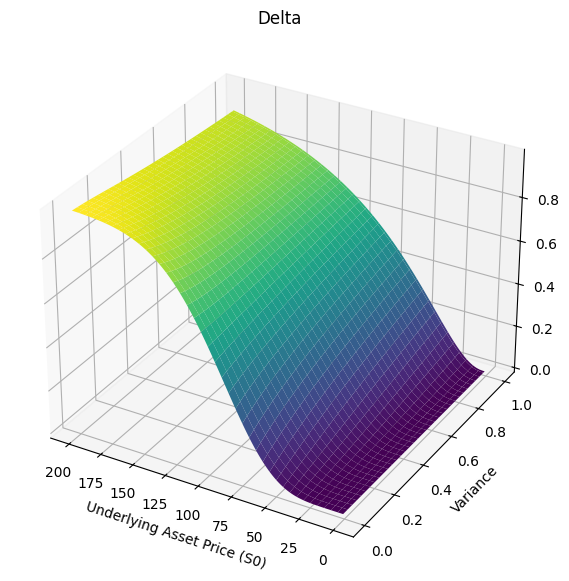

In [11]:
# Create a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(S0_grid, v0_grid, delta_grid, cmap='viridis')
ax.invert_xaxis()

# Labels
ax.set_title('Delta')
ax.set_xlabel('Underlying Asset Price (S0)')
ax.set_ylabel('Variance')


# Show the plot
plt.show()

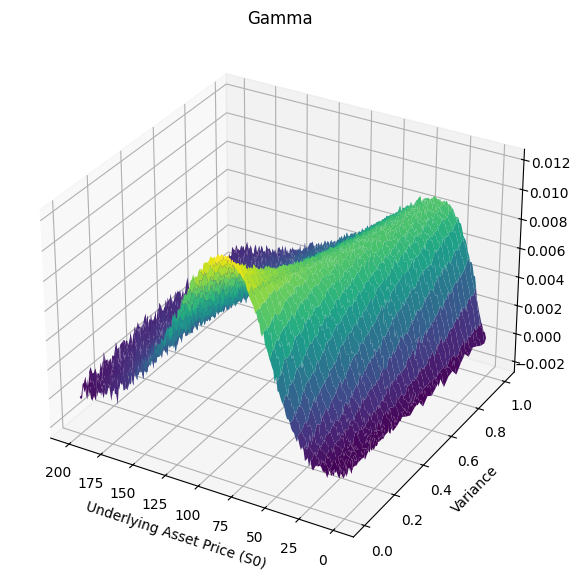

In [12]:
# Create a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(S0_grid, v0_grid, gamma_grid, cmap='viridis')
ax.invert_xaxis()

# Labels
ax.set_title('Gamma')
ax.set_xlabel('Underlying Asset Price (S0)')
ax.set_ylabel('Variance')


# Show the plot
plt.show()

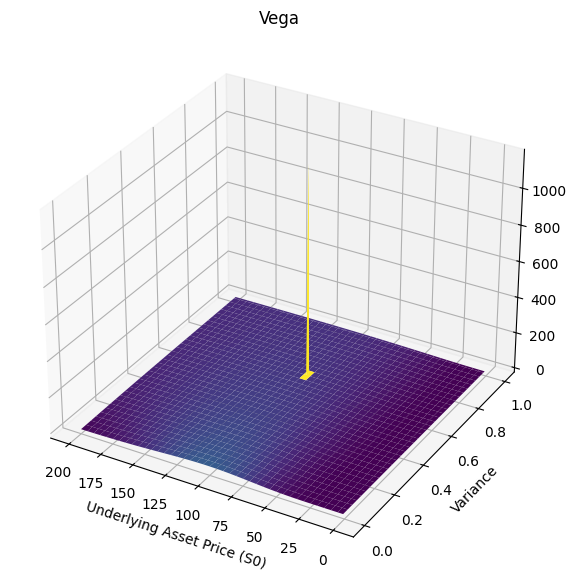

In [13]:
# Create a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(S0_grid, v0_grid, vega_grid, cmap='viridis')
ax.invert_xaxis()

# Labels
ax.set_title('Vega')
ax.set_xlabel('Underlying Asset Price (S0)')
ax.set_ylabel('Variance')


# Show the plot
plt.show()